## Histograms

In [1]:
# First import the packages we need

import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors as colors


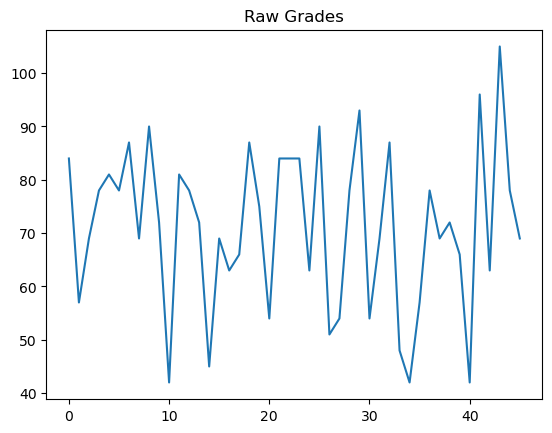

In [3]:
# Example of histograms - not in book

# A list of students' grades in an exam.
grades = [84,57,69,78,81,78,87,69,90,72,42,81,78,72,45,69,63,
          66,87,75,54,84,84,84,63,90,51,54,78,93,54,69,87,48,
          42,57,78,69,72,66,42,96,63,105,78,69]

plt.plot(grades)
plt.title('Raw Grades')
plt.show()

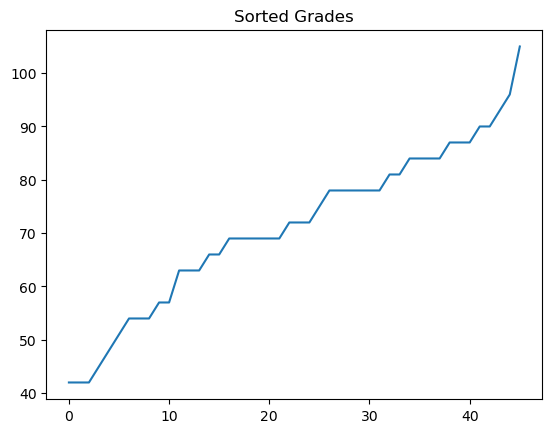

In [5]:
# Sort the grades and then plot them

plt.plot(np.sort(grades))
plt.title('Sorted Grades')
plt.show()

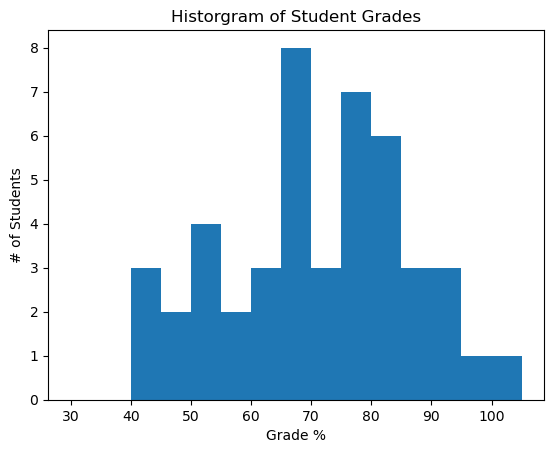

In [6]:
# Make a histogram of the grades

#plt.hist(grades)  # Automatic binning
plt.hist(grades,bins=range(30,110,5))
plt.xlabel('Grade %')
plt.ylabel('# of Students')
plt.title('Historgram of Student Grades')
plt.show()

(1000,)


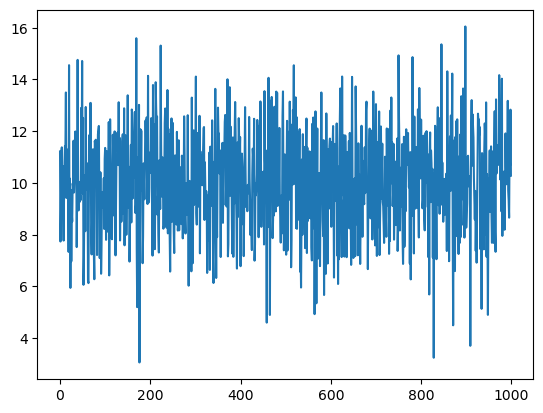

In [7]:
# Let's look at a bigger dataset that we know more about
# Gaussian.txt are numbers generated from a Gaussian function
# mean = 10 and sigma = 2.

gaus = np.loadtxt('Gaussian.txt')

print(gaus.shape)

plt.plot(gaus)
plt.show()

# Make a nice useless plot

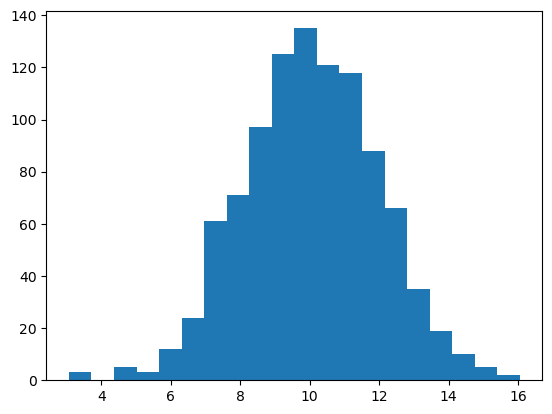

In [8]:
# Let's make a histogram

plt.hist(gaus,bins=20)
plt.show()

# Looks like mean is around 10
# full-width half max is around 4-5


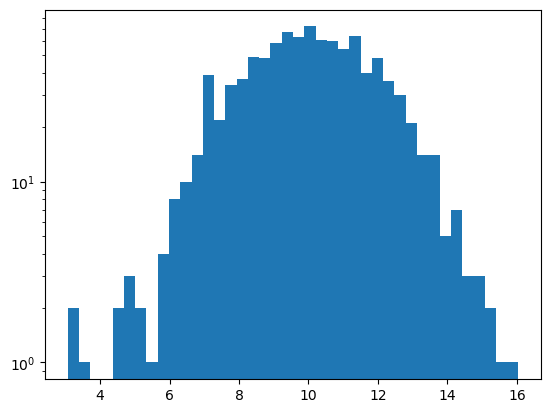

In [16]:
# Since a Gaussian is exp(-x^2/(2*sigma^2)), the log will look like a parabola:

plt.hist(gaus,bins=40)
plt.yscale('log')
plt.show()


(array([ 2,  1,  0,  0,  2,  3,  2,  1,  4,  8, 10, 14, 39, 22, 34, 37, 49,
       48, 58, 67, 63, 72, 61, 60, 54, 64, 40, 48, 36, 30, 21, 14, 14,  5,
        7,  3,  3,  2,  1,  1]), array([ 3.06408  ,  3.3886445,  3.713209 ,  4.0377735,  4.362338 ,
        4.6869025,  5.011467 ,  5.3360315,  5.660596 ,  5.9851605,
        6.309725 ,  6.6342895,  6.958854 ,  7.2834185,  7.607983 ,
        7.9325475,  8.257112 ,  8.5816765,  8.906241 ,  9.2308055,
        9.55537  ,  9.8799345, 10.204499 , 10.5290635, 10.853628 ,
       11.1781925, 11.502757 , 11.8273215, 12.151886 , 12.4764505,
       12.801015 , 13.1255795, 13.450144 , 13.7747085, 14.099273 ,
       14.4238375, 14.748402 , 15.0729665, 15.397531 , 15.7220955,
       16.04666  ]))
(40,) (41,)


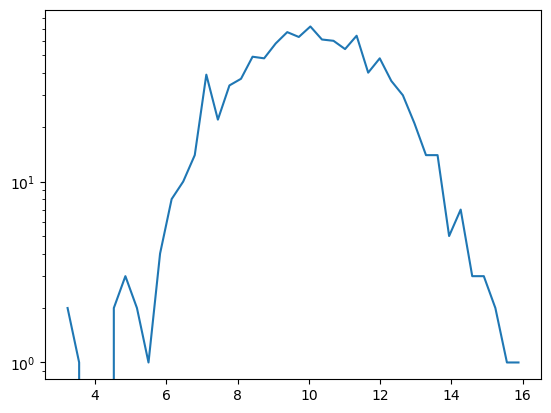

In [27]:
# if you want actual data from a histogram, use np.histogram

hist = np.histogram(gaus,bins=40)

print(hist)

num = hist[0]
bin_edges = hist[1]

print(num.shape,bin_edges.shape)

bin_centers = bin_edges[0:-1]+(bin_edges[1]-bin_edges[0])/2   # For equally sized bins

plt.plot(bin_centers,num)
#plt.bar(bin_edges[:-1],num,width=bin_edges[1]-bin_edges[0])
#plt.bar(bin_centers,num,width=bin_edges[1]-bin_edges[0])

plt.yscale('log')
plt.show()


(7860, 2)


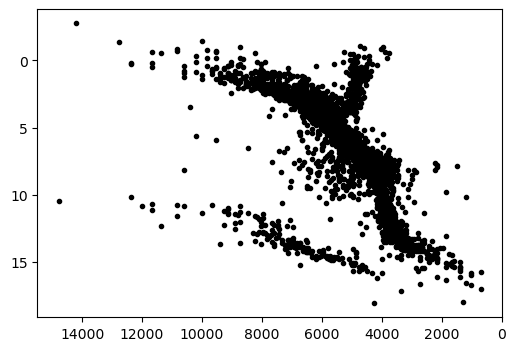

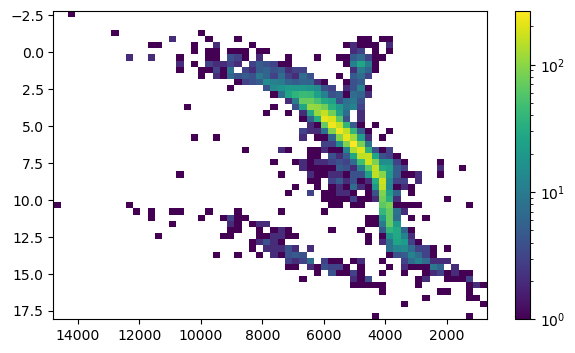

In [65]:
# Can also make a histogram with 2D data:

stars = np.loadtxt('stars.txt')

print(stars.shape)

# Make a plot, but to dense to see anything:

fig,ax = plt.subplots(figsize=(6,4))

plt.plot(stars[:,0],stars[:,1],'k.')
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()


fig,ax = plt.subplots(figsize=(7,4))

plt.hist2d(stars[:,0],stars[:,1],bins=[60,50],norm=colors.LogNorm() )
plt.colorbar()
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()



(60, 50)
(61,)


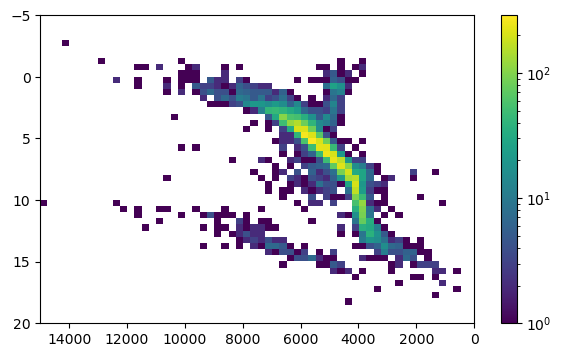

In [72]:
# Make a 2d histogram using np, wiht a fixed range to cover:

star_hist = np.histogram2d(stars[:,0],stars[:,1],bins=[60,50],range=[[0,15000],[-5,20]])
#star_hist = np.histogram2d(stars[:,0],stars[:,1],bins=[60,50],range=[[2000,12000],[0,15]])

# Extract the arrays from the tuple returned by np.histogram2d

star_image = star_hist[0]
star_edges_x = star_hist[1]
star_edges_y = star_hist[2]

#star_image = np.rot90(star_image)

print(star_image.shape)
print(star_edges_x.shape)

# Now plot the 2d histogram using plt.imshow.  We need to set quite a few options to get it to look nice.

# Note that imshow imterperates a 2d array as row and columns, so y by x, rather than x by y.  So we need to rotate it.

fig,ax = plt.subplots(figsize=(7,4))

#plt.hist2d(stars[:,0],stars[:,1],bins=[50,50],norm=colors.LogNorm() )
plt.imshow(np.rot90(star_image), interpolation='none', norm=colors.LogNorm(), 
           extent=[star_edges_x[0],star_edges_x[-1],star_edges_y[0],star_edges_y[-1]],  # Make axes with the right values
           aspect='auto')  # or 'equal' to get square pixels.  'equal' is the default.
plt.colorbar()
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()
